## Reporte Aeropuertos de México

#### Código
Esta primer parte contiene todo el código necesario para que el cuaderno funcione.

In [2]:
#Importar librerías y configuración inicial
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["figure.figsize"] = (16,9)

In [3]:
#Cargar los datos
ac = pd.read_csv('./airports-extended.csv')
ac = ac[ac["country"]== "Mexico"]
a = pd.read_html("https://es.wikipedia.org/wiki/Anexo:Aeropuertos_de_M%C3%A9xico")

In [4]:
# Ubicación inicial del mapa
start_location_lat = ac[ac['country']=='Mexico']['lat'].median()
start_location_long = ac[ac['country']=='Mexico']['long'].median()

In [5]:
# AEROPUERTOS INTERNACIONALES
clase1 = a[0]
clase1.columns = clase1.columns.droplevel()
clase2 = a[2]
clase2.columns = clase2.columns.droplevel()
clase3 = a[4]
clase3.columns = clase3.columns.droplevel()

ai = ac.merge(clase1[["Operador","IATA"]], left_on="code3", right_on="IATA")
ai = pd.concat([ai,ac.merge(clase2[["Operador","IATA"]], left_on="code3", right_on="IATA")])
ai = pd.concat([ai,ac.merge(clase3[["Operador","IATA"]], left_on="code3", right_on="IATA")])

m_i = folium.Map(location =[start_location_lat, start_location_long], zoom_start=4)

asa = folium.FeatureGroup(name="ASA")
oma = folium.FeatureGroup(name="OMA")
gap = folium.FeatureGroup(name="GAP")
asur = folium.FeatureGroup(name="ASUR")
gacm = folium.FeatureGroup(name="GACM")
otros = folium.FeatureGroup(name="otros")

for row in ai[ai['Operador']=='ASA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='blue')).add_to(asa)
for row in ai[ai['Operador']=='OMA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='red')).add_to(oma)
for row in ai[ai['Operador']=='GAP'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='green')).add_to(gap)
for row in ai[ai['Operador']=='ASUR'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='orange')).add_to(asur)
for row in ai[ai['Operador']=='GACM'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='purple')).add_to(gacm)
for row in ai[~(ai['Operador'].isin(["ASA", "OMA", "GAP", "ASUR", "GACM"]))].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='black')).add_to(otros)



In [6]:
# AEROPUERTOS NACIONALES
nacionales = a[5]
nacionales.columns = nacionales.columns.droplevel()
an = ac.merge(nacionales[["Operador","IATA"]], left_on="code3", right_on="IATA")

m_n = folium.Map(location =[start_location_lat, start_location_long], zoom_start=4)

asa = folium.FeatureGroup(name="ASA")
oma = folium.FeatureGroup(name="OMA")
gap = folium.FeatureGroup(name="GAP")
asur = folium.FeatureGroup(name="ASUR")
gacm = folium.FeatureGroup(name="GACM")
otros = folium.FeatureGroup(name="otros")

for row in an[an['Operador']=='ASA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='blue')).add_to(asa)
for row in an[an['Operador']=='OMA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='red')).add_to(oma)
for row in an[an['Operador']=='GAP'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='green')).add_to(gap)
for row in an[an['Operador']=='ASUR'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='orange')).add_to(asur)
for row in an[an['Operador']=='GACM'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='purple')).add_to(gacm)
for row in ai[~(ai['Operador'].isin(["ASA", "OMA", "GAP", "ASUR", "GACM"]))].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='black')).add_to(otros)

In [34]:
#Estimaciones vuelo
cancun = {
	"DFW":{
		"fpw": 77,
		"2020": 253000
	},
	"PTY":{
		"fpw": 55,
		"2020": 100000
	},
	"IAH":{
		"fpw": 52,
		"2020": 253000
	},
	"MIA":{
		"fpw": 49,
		"2020": 145000
	},
	"ORD":{
		"fpw": 49,
		"2020": 250000
	},
	"ATL":{
		"fpw": 48,
		"2020": 153000
	},
	"JFK":{
		"fpw": 40,
		"2020": 148000
	}
}
l=[]
for i in cancun.values():
	# print (i)
	l.append(i['2020']/i['fpw']/52)
np.mean(l)

68.45605826669407

## Reporte

En esta sección mostramos los resultados en una manera más sencilla de entender junto con interpretaciones principales de los datos

### Datos importantes:
- #### Número de aeropuertos: 78
- #### Aeropuertos internacionales: 62
- #### Aeropuertos nacionales: 16

Según los datos obtenidos, en el 2020 hubo más de 19 millones de vuelos internacionales. Y en caso de digitalizar algún proceso, el impacto sería el siguiente:
- ### Ahorros de 4.5 - 9 MDP
- ### +19 millones de hojas de papel ahorrado
- ### En promedio viajan 40-90 pasajeros por vuelo

[Text(0.5, 0, 'Pasajeros anuales por aeropuerto (millones)')]

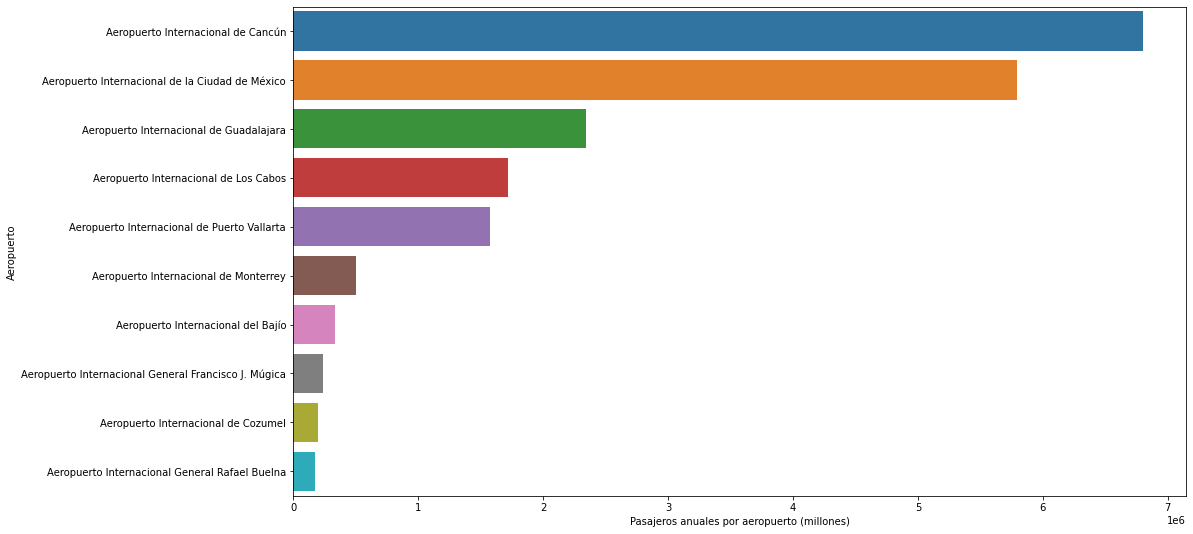

In [16]:
# Total Vuelos internacionales
vuelos_internacionales=a[11]
ax = sns.barplot(y=vuelos_internacionales["Aeropuerto"], x=vuelos_internacionales["2020"])
ax.set(xlabel="Pasajeros anuales por aeropuerto (millones)")

In [31]:
# PRINCIPALES AEROPUERTOS:
top10 = a[10].loc[:10,["Aeropuerto","2020[12]\u200b"]]
top10.rename(columns={"2020[12]\u200b":"Pasajeros"})

,Aeropuerto,Pasajeros
0,Aeropuerto Internacional de la Ciudad de México,21977268
1,Aeropuerto Internacional de Cancún,12259148
2,Aeropuerto Internacional de Guadalajara,8094115
3,Aeropuerto Internacional de Tijuana,6310798
4,Aeropuerto Internacional de Monterrey,4994170
5,Aeropuerto Internacional de Los Cabos,2927987
6,Aeropuerto Internacional de Puerto Vallarta,2489825
7,Aeropuerto Internacional del Bajío,1377573
8,Aeropuerto Internacional Federal de Culiacán,1373102
9,Aeropuerto Internacional de Mérida,1297308


[Text(0.5, 0, 'Estimación de vuelos por aeropuerto del 2020')]

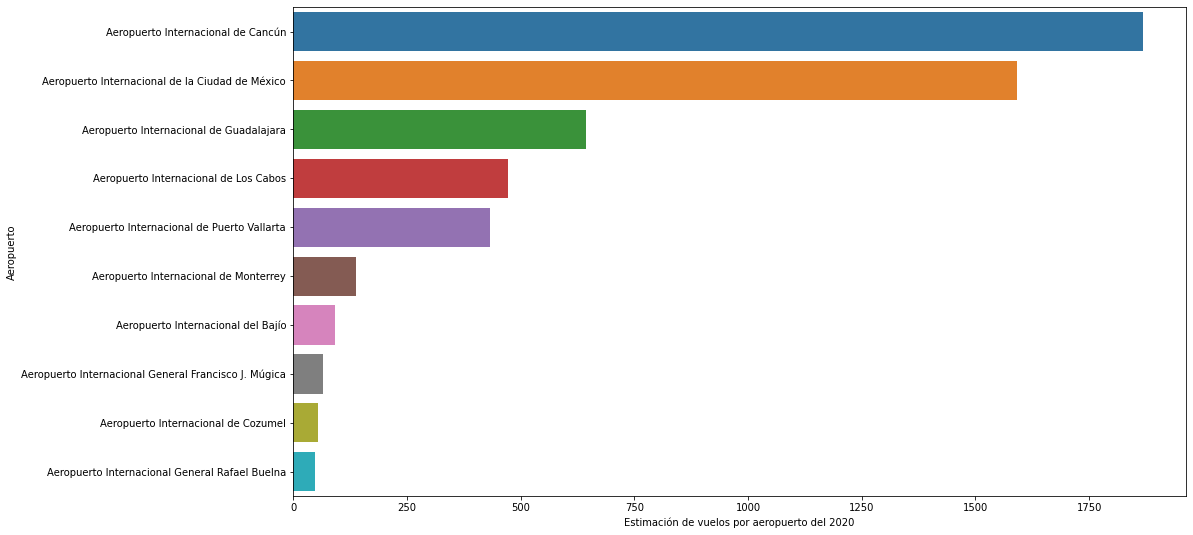

In [15]:
# Vuelos por aeropuerto
ax = sns.barplot(y=vuelos_internacionales["Aeropuerto"], x=vuelos_internacionales["2020"]/70/52)
ax.set(xlabel="Estimación de vuelos por aeropuerto del 2020") 


<AxesSubplot:xlabel='IATA', ylabel='2020[12]\u200b'>

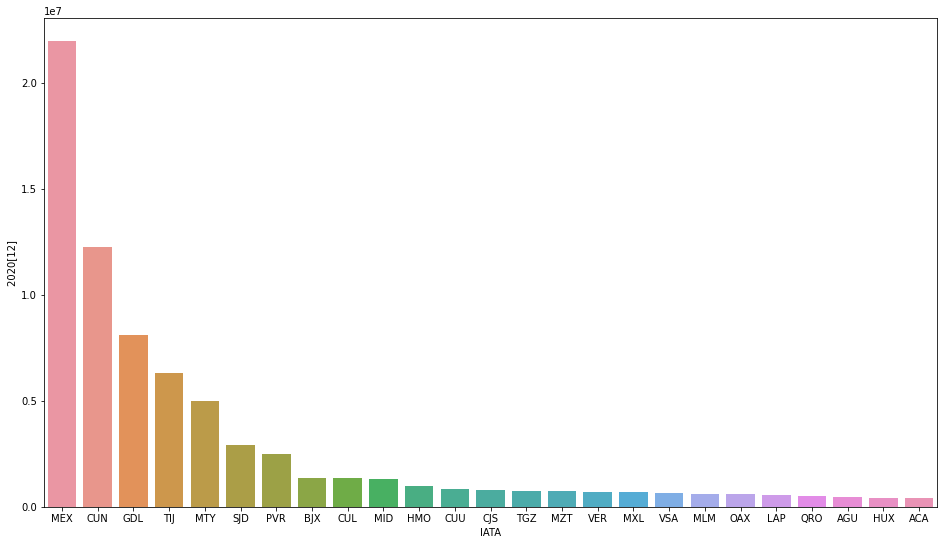

In [11]:
## Transporte nacional
vuelos_nacionales= a[10]
sns.barplot(x=vuelos_nacionales["IATA"], y=vuelos_nacionales["2020[12]\u200b"])

<AxesSubplot:xlabel='2020', ylabel='Aeropuerto'>

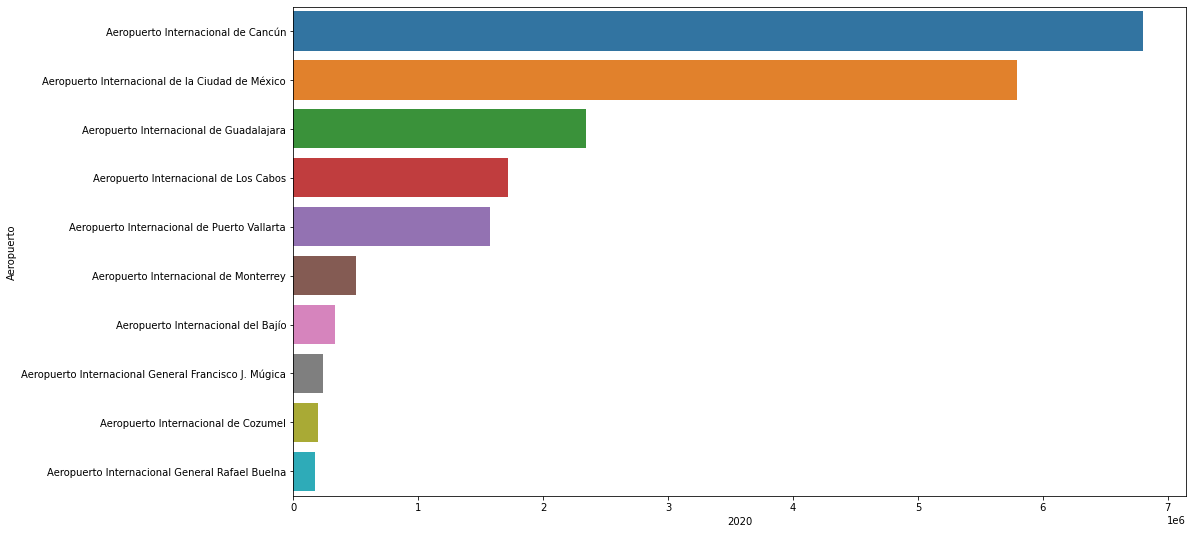

In [12]:
vuelos_internacionales=a[11]
sns.barplot(y=vuelos_internacionales["Aeropuerto"], x=vuelos_internacionales["2020"])

In [22]:
# Mapa aeropuertos internacionales
m_i.add_child(asa)
m_i.add_child(oma)
m_i.add_child(gap)
m_i.add_child(asur)
m_i.add_child(gacm)
m_i.add_child(otros)

m_i.add_child(folium.map.LayerControl())

In [24]:
#Mapa Aeropuertos nacionales
m_n.add_child(asa)
m_n.add_child(oma)
m_n.add_child(gap)
m_n.add_child(asur)
m_n.add_child(gacm)
m_n.add_child(otros)

m_n.add_child(folium.map.LayerControl())